<a href="https://colab.research.google.com/github/powersurge8891/Data-mining-with-Python/blob/main/XGBoost_and_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries and data

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/9. XGBoost _ SHAP

/content/drive/MyDrive/Data Mining for Business in Python/9. XGBoost _ SHAP


In [ ]:
!pip install SHAP

In [3]:
import pandas as pd
import xgboost as xgb

In [4]:
dataset=pd.read_csv('car_prices.csv').drop(columns='Unnamed: 0')
dataset.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


###Splitting Data

In [5]:
y= dataset.Price
X= dataset.iloc[:, 1:]

In [6]:
from sklearn.model_selection import  train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y, random_state=1502, test_size= 0.2)

In [7]:
X_train.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
377,19455,4,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0
401,22964,6,4,1,1,0,1,0,0,0,0,0,0,0,0,1,0
204,25979,6,4,1,1,0,0,0,0,0,0,1,0,0,0,1,0
645,20472,8,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
193,31197,8,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0


In [8]:
#creating matrices
Train= xgb.DMatrix(X_train, label=y_train)

Test= xgb.DMatrix(X_test, label=y_test)

###XGBoost

In [11]:
#Parameters
Parameters= {'learning_rate':0.3,
             'max_depth':6,
             'colsample_bytree':1,
             'subsample':1,
             'min_child_weight':1,
             'gamma':0,
             'random_state':1502,
             'eval_metric':"rmse",
             'objective':"reg:squarederror"
    
}

In [12]:
#XGBoost model
model= xgb.train(params=Parameters,
                 dtrain= Train,
                 num_boost_round= 15,
                 evals= [(Test, "Price")],
                 verbose_eval=2
                 )

[0]	Price-rmse:15669.2
[2]	Price-rmse:8322.17
[4]	Price-rmse:4662.32
[6]	Price-rmse:3132.78
[8]	Price-rmse:2565.49
[10]	Price-rmse:2437.9
[12]	Price-rmse:2379.03
[14]	Price-rmse:2363.41


###Model assessement

In [14]:
#Predictions
predictions= model.predict(Test)
predictions[:5]

array([18337.92 , 13038.506, 30142.674, 41111.992, 11066.108],
      dtype=float32)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print(round(mean_absolute_error(y_test,predictions),1))
print(round(mean_squared_error(y_test,predictions),1))
print(round(np.sqrt(mean_squared_error(y_test,predictions)),1))

1686.5
5585696.7
2363.4


###Drivers analysis with SHAP

In [20]:
#Preparation
import shap
explainer= shap.TreeExplainer(model)
shap_val= explainer.shap_values(X_test)

In [27]:
#Local interpretability
shap.initjs() #JavaScript code for ensuring we get our graph inline.
shap.force_plot(explainer.expected_value, shap_val[3,:], X_test.loc[144] )
#drivers for a single record

In [23]:
X_test.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
524,22891,6,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
344,7278,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45,9795,4,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0
144,14095,8,4,1,0,1,0,1,0,0,0,0,0,0,0,1,0
507,32458,4,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
shap_val

array([[ -658.48663 ,  1047.0729  ,  -313.295   , ...,    32.945   ,
          -53.55775 ,   -73.04561 ],
       [ 2138.6614  , -4721.1436  ,  -197.68057 , ...,    20.11759 ,
          -43.92941 ,   -52.546806],
       [ 2307.5637  , -2548.11    ,  -377.12265 , ...,    52.53792 ,
         -326.0129  ,   -40.327442],
       ...,
       [ -452.89258 ,   481.52557 ,   886.97546 , ...,   -24.432137,
           27.517256,   -48.560505],
       [ -817.26544 , -3610.4487  ,   751.95483 , ...,    45.167393,
           74.90731 ,   -99.84513 ],
       [ -753.17017 ,  1153.115   ,  -327.14847 , ...,    29.646397,
          -58.847965,   -63.34895 ]], dtype=float32)

In [28]:
shap.initjs() #JavaScript code for ensuring we get our graph inline.
shap.force_plot(explainer.expected_value, shap_val, X_test)
#drivers for all records

###Dependency plot

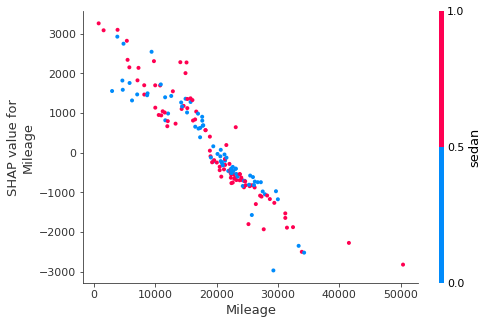

In [29]:
shap.dependence_plot('Mileage', shap_val, X_test)

###Summary plot or global interpretability

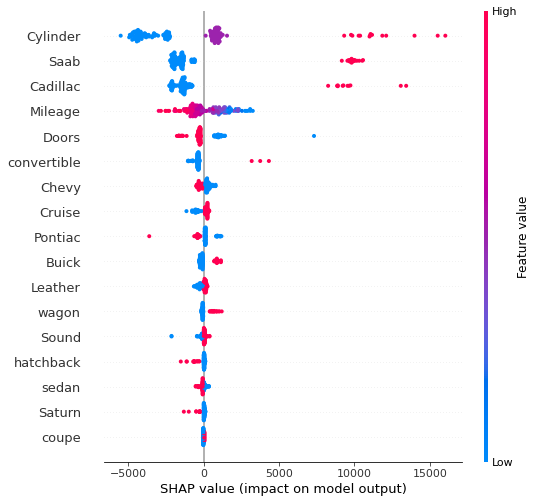

In [30]:
shap.summary_plot(shap_val, X_test)